In [73]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [74]:
def centroid(img):
    img = np.array(img)
    total = 0
    s_x = 0
    s_y = 0

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            total += img[x, y]
            s_x += x * img[x, y]
            s_y += y * img[x, y]
    
    centroid_x = s_x / total
    centroid_y = s_y / total

    return centroid_y, centroid_x, total

In [75]:
centroid(np.array(Image.open(r"C:\Users\nickk\classes_notes\pattern_recognition\lab3\types\a.bmp").convert('L')))

(28.423559258580724, 47.18997156352803, 1255430)

In [76]:
def centr_moments(img, x_c, y_c, μ_00):
    img = np.array(img)
    moments = [μ_00]
    
    p = 0
    q = 2
    μ = 0.0
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            μ += ((x - x_c) ** p) * ((y - y_c) ** q) * img[y, x]
    moments.append(μ)
            
    p = 2
    q = 0
    μ = 0.0
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            μ += ((x - x_c) ** p) * ((y - y_c) ** q) * img[y, x]
    moments.append(μ)

    p = 1
    q = 1
    μ = 0.0
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            μ += ((x - x_c) ** p) * ((y - y_c) ** q) * img[y, x]
    moments.append(μ)

    return moments

In [77]:
centr_moments(np.array(Image.open(r"C:\Users\nickk\classes_notes\pattern_recognition\lab3\types\a.bmp").convert('L')), 0, 0, 1)

[1, 3846200464.0, 1376270417.0, 1685539895.0]

In [85]:

centr_moments(np.array(Image.open(r"C:\Users\nickk\classes_notes\pattern_recognition\lab3\samples\a1.bmp").convert('L')), 0, 0, 1)

[1, 3919957335.0, 1329557219.0, 1664153992.0]

In [78]:
def norm_moments(central_moments):
    moments = []
    
    p = 0
    q = 2
    
    η = central_moments[1] / (central_moments[0] ** ((p + q) / 2 + 1))
    moments.append(η)
    
    p = 2
    q = 0
    
    η = central_moments[2] / (central_moments[0] ** ((p + q) / 2 + 1))
    moments.append(η)


    p = 1
    q = 1
    
    η = central_moments[3] / (central_moments[0] ** ((p + q) / 2 + 1))
    moments.append(η)

    return moments

In [79]:
def calculate_all(image):
    centroid_x, centroid_y, total_intensity = centroid(image)
    central_moments = centr_moments(image, centroid_x, centroid_y, total_intensity)
    normalized_moments = norm_moments(central_moments)
    
    return normalized_moments

In [80]:
def compare(image1, image2):
    moments1 = calculate_all(image1)
    moments2 = calculate_all(image2)
    
    F1_1 = (moments1[0] - moments1[1])**2 + 4 * moments1[2]**2
    F1_2 = (moments2[0] - moments2[1])**2 + 4 * moments2[2]**2


    F2_1 = (moments1[0] + moments1[1])
    F2_2 = (moments2[0] + moments2[1])
    
    return np.abs(F1_1 - F1_2) + np.abs(F2_1 - F2_2)  

In [81]:
def find_match(test_img, types):
    min_diff = float('inf')
    match = None
    for label, etalon_img in types.items():
        diff = compare(test_img, etalon_img)
        if diff < min_diff:
            min_diff = diff
            match = label
    return match

In [82]:
types = {name[:-4]: Image.open("types/" + name).convert('L') for name in os.listdir("types") }
types

{'a': <PIL.Image.Image image mode=L size=57x96>,
 'b': <PIL.Image.Image image mode=L size=68x122>,
 'f': <PIL.Image.Image image mode=L size=62x95>,
 'm': <PIL.Image.Image image mode=L size=90x97>}

In [83]:
samples = {name[:-4]: Image.open("samples/" + name).convert('L') for name in os.listdir("samples") }
samples

{'a1': <PIL.Image.Image image mode=L size=57x96>,
 'a2': <PIL.Image.Image image mode=L size=57x96>,
 'b1': <PIL.Image.Image image mode=L size=68x98>,
 'f1': <PIL.Image.Image image mode=L size=62x95>,
 'm1': <PIL.Image.Image image mode=L size=90x97>}

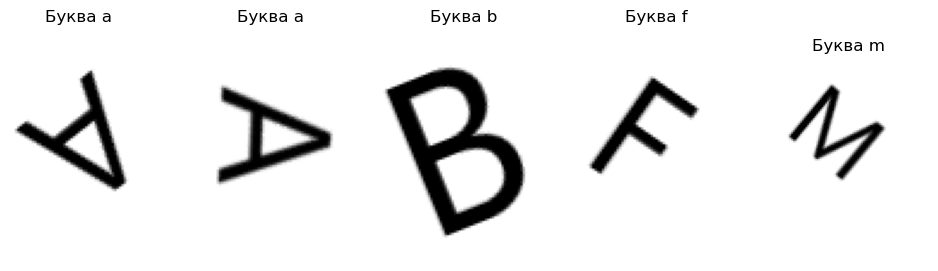

In [84]:
fig, axes = plt.subplots(1, len(samples), figsize=(12, 3))
for i, image in enumerate(samples.values()):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Буква {find_match(image, types)}")
    axes[i].axis('off')
plt.show()